# 2장 시계열 데이터의 발견과 정리 - R

> 시계열 데이터의 발견과 정리 중 R을 사용하는 부분의 소스코드 입니다.
- author: "Chansung Park"
- toc: false
- comments: false
- categories: [exploratory data analysis]
- permalink: /chapter2-R/
- badges: true
- hide_github_badge: true

In [ ]:
install.packages("zoo")
install.packages("data.table")

library(zoo)
library(data.table)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [ ]:
# 41 page
require(zoo)
require(data.table)

unemp <- fread("https://raw.githubusercontent.com/PracticalTimeSeriesAnalysis/BookRepo/master/Ch02/data/UNRATE.csv")
unemp[, DATE := as.Date(DATE)]
setkey(unemp, DATE)

rand.unemp.idx <- sample(1:nrow(unemp), .1*nrow(unemp))
rand.unemp <- unemp[-rand.unemp.idx]

high.unemp.idx <- which(unemp$UNRATE > 8)
num.to.select <- .2 * length(high.unemp.idx)
high.unemp.idx <- sample(high.unemp.idx,)
bias.unemp <- unemp[-high.unemp.idx]

In [ ]:
# 43 page
all.dates <- seq(from=unemp$DATE[1], to=tail(unemp$DATE, 1), by="months")
rand.unemp = rand.unemp[J(all.dates), roll=0]
bias.unemp = bias.unemp[J(all.dates), roll=0]
rand.unemp[, rpt := is.na(UNRATE)]

NULL

NULL

NULL

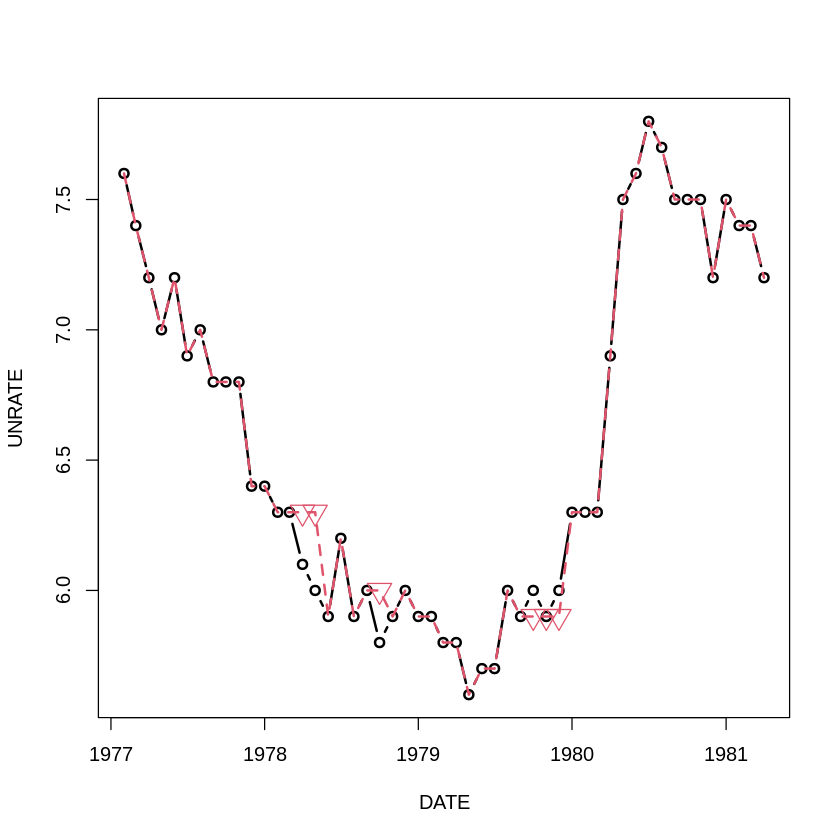

In [ ]:
rand.unemp[, impute.ff := na.locf(UNRATE, na.rm=FALSE)]
bias.unemp[, impute.ff := na.locf(UNRATE, na.rm=FALSE)]

unemp[350:400, plot(DATE, UNRATE, col=1, lwd=2, type='b')]
rand.unemp[350:400, lines(DATE, impute.ff, col=2, lwd=2, lty=2)]
rand.unemp[350:400][rpt==TRUE, points(DATE, impute.ff, col=2, pch=6, cex=2)]

In [ ]:
# 47 page
rand.unemp[, impute.rm.nolookahead := rollapply(c(NA, NA, UNRATE), 3, 
            function(x) {
              if (!is.na(x[3])) x[3] else mean(x, na.rm=TRUE)
            })]
bias.unemp[, impute.rm.nolookahead := rollapply(c(NA, NA, UNRATE), 3, 
            function(x) {
              if (!is.na(x[3])) x[3] else mean(x, na.rm=TRUE)
            })]

In [ ]:
rand.unemp[, complete.rm := rollapply(c(NA, UNRATE, NA), 3,
            function(x) {
              if (!is.na(x[2])) x[2] else mean(x, na.rm=TRUE)
            })]

NULL

NULL

NULL

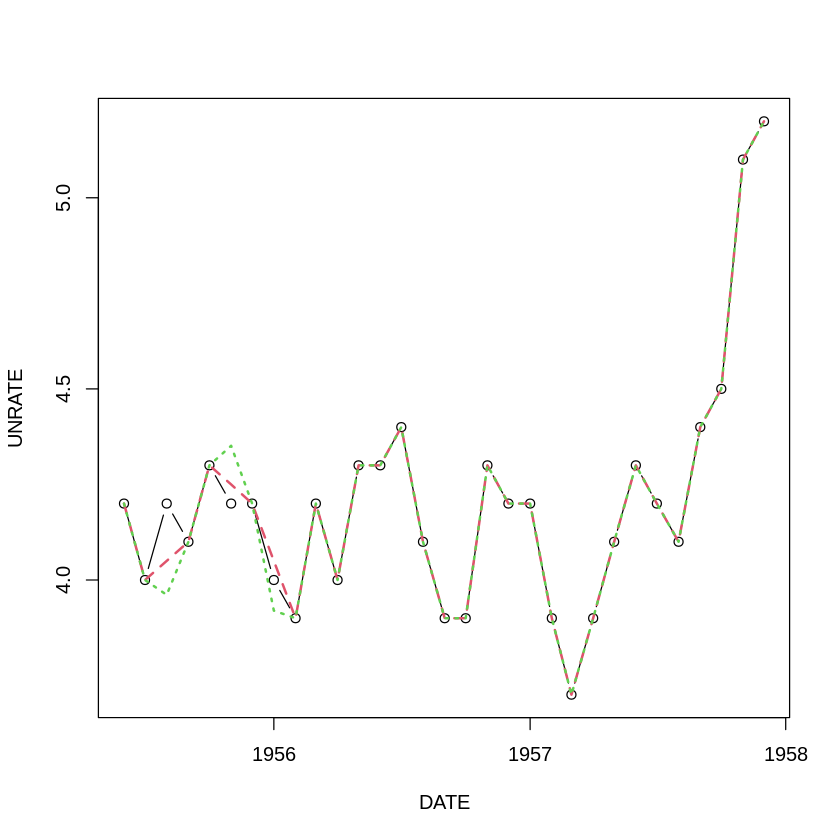

In [ ]:
# page 49
rand.unemp[, impute.li := na.approx(UNRATE)]
bias.unemp[, impute.li := na.approx(UNRATE)]

rand.unemp[, impute.sp := na.spline(UNRATE)]
bias.unemp[, impute.sp := na.spline(UNRATE)]

use.idx = 90:120
unemp[use.idx, plot(DATE, UNRATE, col = 1, type = 'b')]
rand.unemp[use.idx, lines(DATE, impute.li, col = 2, lwd = 2, lty = 2)]
rand.unemp[use.idx, lines(DATE, impute.sp, col = 3, lwd = 2, lty = 3)]

In [ ]:
# 51 page
sort(rand.unemp[ , lapply(.SD, function(x) mean((x - unemp$UNRATE)^2, na.rm = TRUE)),
    .SDcols = c("impute.ff", "impute.rm.nolookahead", "impute.li", "impute.sp")])

impute.li,impute.sp,impute.rm.nolookahead,impute.ff
<dbl>,<dbl>,<dbl>,<dbl>
0.002505595,0.003838879,0.006694313,0.00686019


In [ ]:
sort(bias.unemp[ , lapply(.SD, function(x) mean((x - unemp$UNRATE)^2, na.rm = TRUE)),
    .SDcols = c("impute.ff", "impute.rm.nolookahead", "impute.li", "impute.sp")])

impute.rm.nolookahead,impute.sp,impute.li,impute.ff
<dbl>,<dbl>,<dbl>,<dbl>
0.005572172,0.02323485,0.2163562,0.2318483


In [ ]:
# 53 page
unemp[seq.int(from=1, to=nrow(unemp), by=12)]

DATE,UNRATE
<date>,<dbl>
1948-01-01,3.4
1949-01-01,4.3
1950-01-01,6.5
1951-01-01,3.7
1952-01-01,3.2
1953-01-01,2.9
1954-01-01,4.9
1955-01-01,4.9
1956-01-01,4.0


In [ ]:
unemp[, mean(UNRATE), by=format(DATE, "%Y")]

format,V1
<chr>,<dbl>
1948,3.750000
1949,6.050000
1950,5.208333
1951,3.283333
1952,3.025000
1953,2.925000
1954,5.591667
1955,4.366667
1956,4.125000


In [ ]:
# 54 page
daily.unemployment = unemp[J(all.dates), roll=31]
daily.unemployment

DATE,UNRATE
<date>,<dbl>
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
1948-06-01,3.6
1948-07-01,3.6
1948-08-01,3.9
1948-09-01,3.8


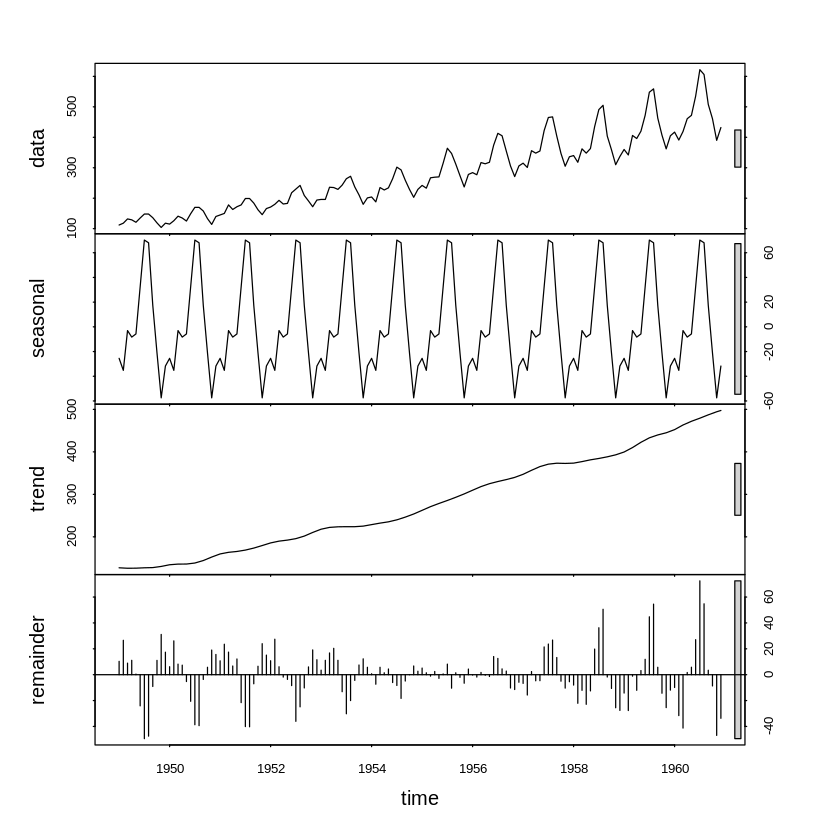

In [ ]:
# 62 page
plot(stl(AirPassengers, "periodic"))